<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/Time_Series_KPIT_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [60]:
df=pd.read_csv("/content/KPITTECH.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-23,109.099998,109.099998,105.550003,109.099998,105.160919,746528
1,2019-04-24,107.000000,114.550003,107.000000,114.550003,110.414146,233998
2,2019-04-25,116.000000,118.300003,110.000000,111.150002,107.136902,941577
3,2019-04-26,106.099998,111.000000,106.099998,108.650002,104.727180,1886188
4,2019-04-30,106.199997,108.500000,103.250000,103.250000,99.522133,273582
...,...,...,...,...,...,...,...
1134,2023-11-21,1624.000000,1624.000000,1492.199951,1505.800049,1505.800049,4639119
1135,2023-11-22,1485.800049,1489.750000,1417.650024,1445.800049,1445.800049,4220073
1136,2023-11-23,1450.000000,1479.849976,1420.099976,1446.449951,1446.449951,2311047
1137,2023-11-24,1454.000000,1482.849976,1436.099976,1468.750000,1468.750000,1609569


In [61]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-23,109.099998,109.099998,105.550003,109.099998,105.160919,746528
1,2019-04-24,107.000000,114.550003,107.000000,114.550003,110.414146,233998
2,2019-04-25,116.000000,118.300003,110.000000,111.150002,107.136902,941577
3,2019-04-26,106.099998,111.000000,106.099998,108.650002,104.727180,1886188
4,2019-04-30,106.199997,108.500000,103.250000,103.250000,99.522133,273582


In [62]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1134,2023-11-21,1624.000000,1624.000000,1492.199951,1505.800049,1505.800049,4639119
1135,2023-11-22,1485.800049,1489.750000,1417.650024,1445.800049,1445.800049,4220073
1136,2023-11-23,1450.000000,1479.849976,1420.099976,1446.449951,1446.449951,2311047
1137,2023-11-24,1454.000000,1482.849976,1436.099976,1468.750000,1468.750000,1609569
1138,2023-11-28,1482.849976,1507.400024,1477.449951,1489.800049,1489.800049,1138990


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1139 non-null   object 
 1   Open       1139 non-null   float64
 2   High       1139 non-null   float64
 3   Low        1139 non-null   float64
 4   Close      1139 non-null   float64
 5   Adj Close  1139 non-null   float64
 6   Volume     1139 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.4+ KB


In [64]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [65]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [66]:
df.duplicated().sum()

0

Candle Stick Chart

In [75]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


Candle Stick Chart with tracel options

In [77]:
fig = go.Figure()
candlestick_trace = go.Candlestick(x=df['Date'],
                                   open=df['Open'],
                                   high=df['High'],
                                   low=df['Low'],
                                   close=df['Close'],
                                   increasing_line_color='green',  # Color for increasing candles
                                   decreasing_line_color='red',    # Color for decreasing candles
                                   showlegend=False,               # Hide legend for this trace
                                   name='Candlesticks')            # Name for the legend
fig.add_trace(candlestick_trace)

moving_average_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=20).mean(),
                                  mode='lines', name='20-day Moving Average', line=dict(color='blue'))
fig.add_trace(moving_average_trace)

fig.update_layout(title='Candlestick Chart with Trace Options',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()


Ploting the trading volume to visualize the amount of trading activity.


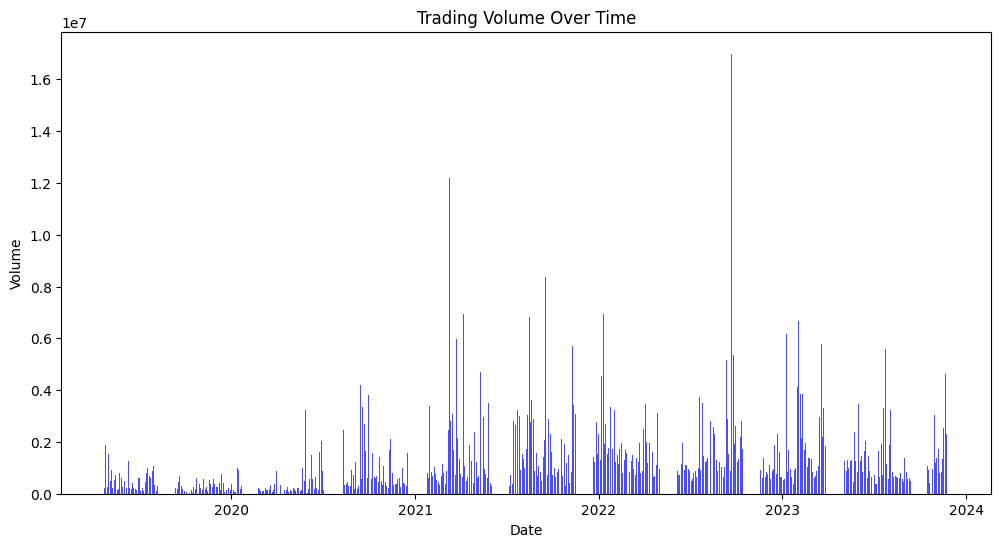

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


Moving Averages:

* Plotting moving averages (e.g., 50-day and 200-day) can help smooth out fluctuations and reveal trends.

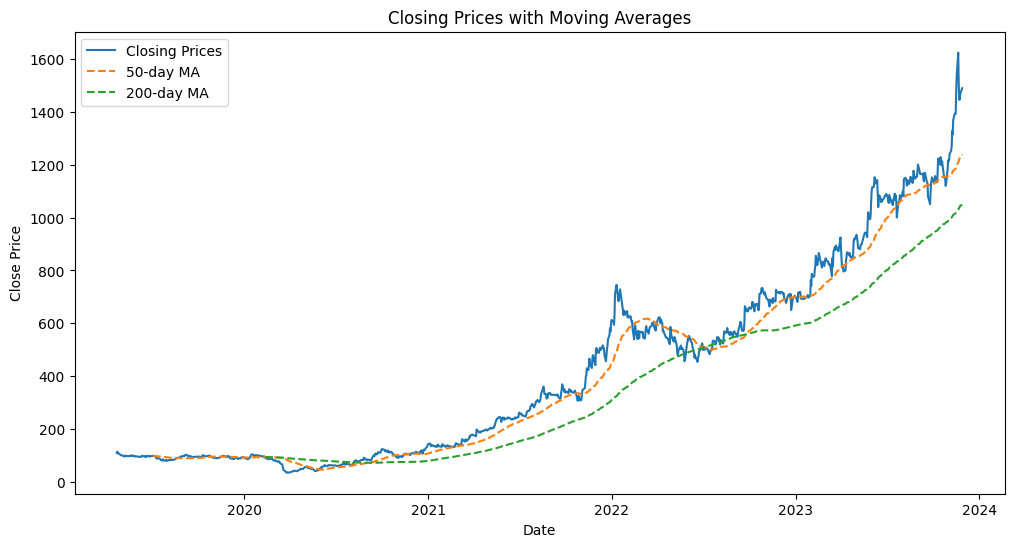

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Prices')
plt.plot(df['Date'], df['Close'].rolling(window=50).mean(), label='50-day MA', linestyle='--')
plt.plot(df['Date'], df['Close'].rolling(window=200).mean(), label='200-day MA', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [78]:
fig = go.Figure()
# Closing Prices trace
closing_prices_trace = go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Prices')
fig.add_trace(closing_prices_trace)
# 50-day Moving Average trace
ma_50_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=50).mean(),
                         mode='lines', name='50-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_50_trace)
# 200-day Moving Average trace
ma_200_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=200).mean(),
                          mode='lines', name='200-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_200_trace)
fig.update_layout(title='Closing Prices with Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend=dict(x=0.7, y=0.95))
fig.show()

Autocorrelation Plot:

* Ploting the autocorrelation function (ACF) to identify any patterns or seasonality in the data.


<Figure size 1200x600 with 0 Axes>

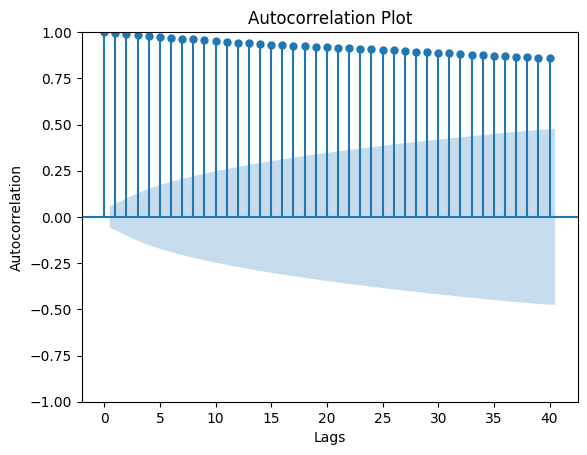

In [72]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=40)
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()


In [68]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)

In [11]:
df=df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [12]:
df.head(10)

,Date,Close
Date,,
2019-04-23,2019-04-23,109.099998
2019-04-24,2019-04-24,114.550003
2019-04-25,2019-04-25,111.150002
2019-04-26,2019-04-26,108.650002
2019-04-30,2019-04-30,103.250000
2019-05-02,2019-05-02,100.199997
2019-05-03,2019-05-03,100.650002
2019-05-06,2019-05-06,98.300003
2019-05-07,2019-05-07,96.949997


In [82]:
tracel = go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Date'
)

layout=go.Layout(
    title='KPIT:Date X Close',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig = go.Figure(data=[tracel],layout=layout)
fig.show()

In [19]:
close_data = df['Close'].values

In [20]:
close_data

array([ 109.099998,  114.550003,  111.150002, ..., 1446.449951,
       1468.75    , 1489.800049])

In [21]:
close_data=close_data.reshape(-1,1)
close_data

array([[ 109.099998],
       [ 114.550003],
       [ 111.150002],
       ...,
       [1446.449951],
       [1468.75    ],
       [1489.800049]])

In [22]:
split_percentage=0.80
split=int(split_percentage * len(close_data))
split

911

In [23]:
close_train = close_data[:split]
close_test = close_data[split:]

In [24]:
print(len(close_train))
print(len(close_test))

911
228


In [25]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.preprocessing .sequence import TimeseriesGenerator


In [48]:
look_back=15
train_generator = TimeseriesGenerator(close_train,close_train,length=look_back,batch_size=30)

In [49]:
test_generator = TimeseriesGenerator(close_test,close_test,length=look_back,batch_size=5)

In [50]:
model = Sequential()
model.add(
    LSTM(10, activation='relu', input_shape=(look_back, 1))
)
model.add(
    Dense(1)
)


In [51]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='mse')

In [52]:
model.fit(train_generator,epochs=100)

Epoch 1/100
30/30 [==============================] - 2s 25ms/step - loss: 125850.6406
Epoch 2/100
30/30 [==============================] - 1s 27ms/step - loss: 125407.2891
Epoch 3/100
30/30 [==============================] - 1s 24ms/step - loss: 124585.8047
Epoch 4/100
30/30 [==============================] - 1s 24ms/step - loss: 122938.7656
Epoch 5/100
30/30 [==============================] - 1s 26ms/step - loss: 120407.2500
Epoch 6/100
30/30 [==============================] - 1s 27ms/step - loss: 116670.1172
Epoch 7/100
30/30 [==============================] - 2s 52ms/step - loss: 60372.1367
Epoch 8/100
30/30 [==============================] - 1s 25ms/step - loss: 18069.9824
Epoch 9/100
30/30 [==============================] - 1s 25ms/step - loss: 11477.6357
Epoch 10/100
30/30 [==============================] - 1s 25ms/step - loss: 6400.4214
Epoch 11/100
30/30 [==============================] - 1s 24ms/step - loss: 3436.3748
Epoch 12/100
30/30 [==============================] - 1s 27

In [55]:
model.save('kpit1.keras')